# Homework 3 Solutions

There are three homework problems.  If a cell is blank or starts with a `# MODIFY` comment, please fill in the appropriate code.  Feel free to add cells as needed (`ESC-a` and `ESC-b`).

## Problem 1 - EDA

Visit www.kaggle.com and create an account.  Identify a dataset (https://www.kaggle.com/datasets) that interests you, and that also has:

* at least 2 numeric columns
* at least 1 categorical column

Add the import statement and "magic" command needed to use pandas and to plot in the notebook.

In [3]:
import pandas as pd
%matplotlib inline

Read your data set into a pandas dataframe.

In [4]:
df = pd.read_csv('../data/kiva_loans.csv')
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,1/1/14
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,1/1/14
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43,6,"user_favorite, user_favorite",female,bullet,1/1/14
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11,8,NaN,female,irregular,1/1/14
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14,16,NaN,female,monthly,1/1/14


Create two lists named `numeric_cols` and `nonnumeric_cols` that contain the column labels for the numeric and non-numeric columns of the data set, respectively.  You should do this _programmatically_, not by hand.

In [7]:
numeric_cols = df.describe().columns.tolist()
nonnumeric_cols = [col for col in df.columns if col not in numeric_cols]

numeric_cols, nonnumeric_cols

(['id',
  'funded_amount',
  'loan_amount',
  'partner_id',
  'term_in_months',
  'lender_count'],
 ['activity',
  'sector',
  'use',
  'country_code',
  'country',
  'region',
  'currency',
  'posted_time',
  'disbursed_time',
  'funded_time',
  'tags',
  'borrower_genders',
  'repayment_interval',
  'date'])

Create a histogram with 20 bins for one of your numeric columns (your choice).

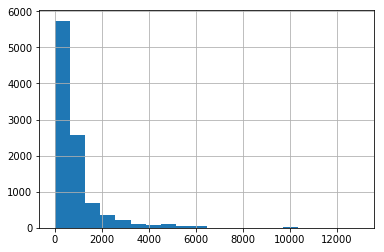

In [8]:
_ = df['funded_amount'].hist(bins=20)

Generate a correlation table for your numeric columns.  How many columns are highly correlated (correlation above, say, 0.5)?

In [10]:
corr = df.corr()
corr

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
id,1.000000,0.003676,0.030904,-0.043882,-0.105015,0.036151
funded_amount,0.003676,1.000000,0.965088,-0.149241,0.141783,0.836759
loan_amount,0.030904,0.965088,1.000000,-0.148043,0.176112,0.804233
partner_id,-0.043882,-0.149241,-0.148043,1.000000,0.233066,-0.082751
term_in_months,-0.105015,0.141783,0.176112,0.233066,1.000000,0.235621
lender_count,0.036151,0.836759,0.804233,-0.082751,0.235621,1.000000


Create a scatter plot with one numeric column on the x-axis and another on the y-axis.  Pick a highly correlated pair of columns, if possible (if this is not possible, just select two columns of your choice).  Give the plot a title and set its size to be 8-by-5 inches.

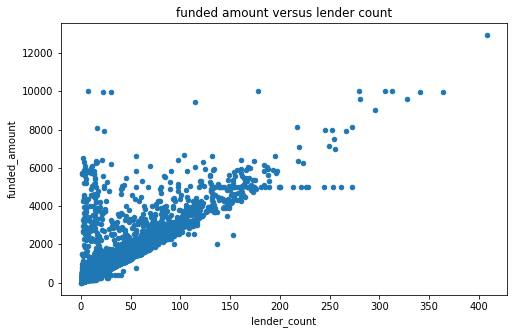

In [11]:
_ = df.plot(kind='scatter', x='lender_count', y='funded_amount',
            title='funded amount versus lender count', figsize=(8, 5))

Use the `groupby` method to create a dataframe of the frequency of each level of one of your categorical columns (your choice).  Then sort by size (greatest frequency to smallest) and keep only the top 10 most frequent categories.  If you have fewer than 10 levels then just keep all of them.

In [23]:
freq = pd.DataFrame(df.groupby('activity').size(), columns=['size'])
freq = freq.sort_values('size', ascending=False).iloc[:10, :]
freq

,size
activity,
General Store,861
Farming,776
Retail,558
Personal Housing Expenses,533
Higher education costs,471
Agriculture,464
Food Production/Sales,394
Clothing Sales,393
Fruits & Vegetables,307


Plot the results of the groupby using a bar chart.

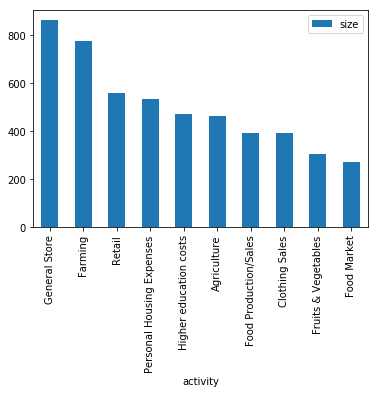

In [24]:
_ = freq.plot(kind='bar')

# Problem 2 - Optimization Modeling Exercise 2.2

In this problem you will solve textbook exercise 2.2 which was on Homework 1.  Your are given partial code and just need to fill in the missing pieces to get the model to work.  The solution to this problem can be found in the Excel file that accompanies this homework assignment.

### Step 1:  Read parameters from Excel file

Read in the the entire first sheet into a dataframe from the model spreadsheet.  Do not use offsets or skip rows, just read in the entire sheet.

In [83]:
raw_data = pd.read_excel("Homework 3 OMs.xlsx", sheet_name="2.2")
raw_data

,Decision variables (pizza types),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,plain,meat,veggie,supreme,NaN,NaN,NaN,NaN,NaN
1,NaN,0,10,0,20,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Objective (maximize revenue),NaN,NaN,NaN,NaN,NaN,value,NaN,NaN,NaN
4,NaN,8,10,12,15,NaN,400,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Constraints,NaN,NaN,NaN,NaN,NaN,LHS,NaN,RHS,slack
7,dough,5,5,5,5,NaN,150,<=,200,50
8,sauce,3,3,3,3,NaN,90,<=,90,0
9,cheese,4,3,3,4,NaN,110,<=,120,10


This next cell extracts the coefficients of the objective function (revenue) and the LHS of the resource constraints for the various ingredients.  You do not need to modify this cell, assuming you followed instructions in the previous cell.

In [84]:
coef = pd.DataFrame(raw_data.iloc[[4, 7, 8, 9, 10, 11], 1:5])
coef.index = ['revenue', 'dough', 'sauce', 'cheese', 'meat', 'veggies']
coef.columns = ['plain', 'meat', 'veggie', 'supreme']
coef

,plain,meat,veggie,supreme
revenue,8,10,12,15
dough,5,5,5,5
sauce,3,3,3,3
cheese,4,3,3,4
meat,0,3,0,2
veggies,0,0,3,2


The next cell reads in the RHS of the constraints into their own dataframe.  You do not need to modify this cell.

In [85]:
rhs = pd.DataFrame(raw_data.iloc[7:12, 8])
rhs.index = coef.index[1:]
rhs.columns = ['rhs']
rhs

,rhs
dough,200
sauce,90
cheese,120
meat,75
veggies,40


### Create a Pyomo model

In this section you will instantiate the decision variables, objective function and constraints for a Pyomo model that solves Exercise 2.2.

First, import the pyomo.environ module as `pe`.

In [95]:
import pyomo.environ as pe

Next, instantiate a ConcreteModel and store it in the variable `model`.

In [96]:
model = pe.ConcreteModel()

Create a list called `decision_index` containing indexes for the decision variables ranging from 0 to 3.

In [97]:
decision_index = list(range(4))

Create a pyomo variable named `x` with domain of nonnegative of real numbers.  Make sure you "attach" this variable to the `model` object.

In [98]:
model.x = pe.Var(decision_index, domain=pe.NonNegativeReals)

The next cell defines the objective function `obj` using the data in the `coefficients` dataframe.  The expression argument, `expr=...`, shows a shorthand way to represent a sumproduct using a "list comprehension".  The `sense=-1` argument tells Pyomo that you want to maximize (`sense=1` is minimization, the default).

In [99]:
model.obj = pe.Objective(expr=sum([coef.iloc[0,i]*model.x[i] for i in decision_index]), sense=-1)

Next we need to define the five constraints using the data in the `coefficients` and `rhs` dataframes.  Make sure to "attach" each constraint to the `model` object.

You've been given the first constraint for "dough" which shows how to use a list comprehension to calculate the LHS sumproduct.  Try to reuse this expression to create the other four constraints.

In [100]:
model.cons_dough = pe.Constraint(expr=sum([coef.iloc[1, i]*model.x[i] for i in decision_index]) <= rhs.iloc[0, 0])
model.cons_sauce = pe.Constraint(expr=sum([coef.iloc[2, i]*model.x[i] for i in decision_index]) <= rhs.iloc[1, 0])
model.cons_cheese = pe.Constraint(expr=sum([coef.iloc[3, i]*model.x[i] for i in decision_index]) <= rhs.iloc[2, 0])
model.cons_meat = pe.Constraint(expr=sum([coef.iloc[4, i]*model.x[i] for i in decision_index]) <= rhs.iloc[3, 0])
model.cons_veggie = pe.Constraint(expr=sum([coef.iloc[5, i]*model.x[i] for i in decision_index]) <= rhs.iloc[4, 0])

### Run the solver and examine the solution

In [101]:
# Run the solver.
opt = pe.SolverFactory('glpk')
success = opt.solve(model, tee=True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmpbje5p6hg.glpk.raw
 --wglp /var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmpujj1y18y.glpk.glp
 --cpxlp /var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmpif3q1zwn.pyomo.lp
Reading problem data from '/var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmpif3q1zwn.pyomo.lp'...
6 rows, 5 columns, 17 non-zeros
51 lines were read
Writing problem data to '/var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmpujj1y18y.glpk.glp'...
41 lines were written
GLPK Simplex Optimizer, v4.65
6 rows, 5 columns, 17 non-zeros
Preprocessing...
5 rows, 4 columns, 16 non-zeros
Scaling...
 A: min|aij| =  2.000e+00  max|aij| =  5.000e+00  ratio =  2.500e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 5
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (4)
*     2: obj =   4.000000000e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTI

This next cell will help you determine whether the solver found a solution or had an error (like poorly defined constraints, or infeasibility).  Pay particular attention to the "Solver" part of the output.

In [102]:
print(success)


Problem: 
- Name: unknown
  Lower bound: 400.0
  Upper bound: 400.0
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 5
  Number of nonzeros: 17
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.03046870231628418
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



The next cell will extract the objective function and optimal solution (assuming the solver found a solution).  You do not need to modify this cell.

In [103]:
obj_val = model.obj.expr()
print('optimal objective value = {}'.format(obj_val))

x = []
for index in model.x_index.value_list:
    x.append(model.x[index].value)
print('optimal x = {}'.format(x))

optimal objective value = 400.0
optimal x = [0.0, 10.0, 0.0, 20.0]


Finally, print the slack in each constraint.  The expression to print the slack in the "dough" constraint is given.

In [104]:
#MODIFY
print('dough slack = {}'.format(model.cons_dough.slack()))

dough slack = 50.0


# Problem 3 - Optimization Modeling Exercise 6.5

See if you can do this one yourself.  To receive full credit, you must read data into two dataframes (like `coef` and `rhs` in the previous problem) and use this to define the objective and constraints.

In [115]:
raw_data = pd.read_excel("Homework 3 OMs.xlsx", sheet_name="6.5")
raw_data

,Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Number of available scientists,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Available budget,300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Project,1,2,3,4,5,6,7,8
5,NaN,Expense ($000),60,110,53,47,92,85,73,65
6,NaN,Scientists Required,7,9,8,4,7,6,8,5
7,NaN,Profit ($000),36,82,29,16,56,61,48,41
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Decisions,NaN,Project 1,Project 2,Project 3,Project 4,Project 5,Project 6,Project 7,Project 8


In [144]:
coef = pd.DataFrame(raw_data.iloc[5:8, 2:10])
coef.index = ['expense', 'scientists', 'profit']
coef.columns = range(8)
coef

,0,1,2,3,4,5,6,7
expense,60,110,53,47,92,85,73,65
scientists,7,9,8,4,7,6,8,5
profit,36,82,29,16,56,61,48,41


In [145]:
rhs = pd.DataFrame(raw_data.iloc[17:21, 4])
rhs.index = ['budget', 'scientists', '2 xor 5', '2 of 5-8']
rhs.columns = ['rhs']
rhs

,rhs
budget,300000
scientists,40
2 xor 5,1
2 of 5-8,2


In [150]:
model = pe.ConcreteModel()

indexes = list(range(8))
model.x = pe.Var(indexes, domain=pe.Binary)
model.obj = pe.Objective(expr=sum(coef.iloc[2,i]*model.x[i] for i in indexes), sense=-1)

model.cons1 = pe.Constraint(expr=1000.*sum(coef.iloc[0,i]*model.x[i] for i in indexes) <= rhs.loc['budget', 'rhs'])
model.cons2 = pe.Constraint(expr=sum(coef.iloc[1,i]*model.x[i] for i in indexes) <= rhs.loc['scientists', 'rhs'])
model.cons3 = pe.Constraint(expr=model.x[1]+model.x[4] <= 1)
model.cons4 = pe.Constraint(expr=model.x[4]+model.x[5]+model.x[6]+model.x[7] >= 2)

opt = pe.SolverFactory('glpk')
success = opt.solve(model, tee=True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmpudkx6157.glpk.raw
 --wglp /var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmph9icnzui.glpk.glp
 --cpxlp /var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmp2qbd5ok0.pyomo.lp
Reading problem data from '/var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmp2qbd5ok0.pyomo.lp'...
/var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmp2qbd5ok0.pyomo.lp:63: warning: lower bound of variable 'x1' redefined
/var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmp2qbd5ok0.pyomo.lp:63: warning: upper bound of variable 'x1' redefined
5 rows, 9 columns, 23 non-zeros
8 integer variables, all of which are binary
71 lines were read
Writing problem data to '/var/folders/j6/vzm_9p_j4_x08rrgkr0f7cb84vgyj9/T/tmph9icnzui.glpk.glp'...
54 lines were written
GLPK Integer Optimizer, v4.65
5 rows, 9 columns, 23 non-zeros
8 integer variables, all of which are binary
Preprocessing...


In [151]:
print(success)


Problem: 
- Name: unknown
  Lower bound: 191.0
  Upper bound: 191.0
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 9
  Number of nonzeros: 23
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 21
      Number of created subproblems: 21
  Error rc: 0
  Time: 0.05381464958190918
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [152]:
obj_val = model.obj.expr()
print('optimal objective value = {}'.format(obj_val))

x = []
for index in model.x_index.value_list:
    x.append(model.x[index].value)
print('optimal x = {}'.format(x))

optimal objective value = 191.0
optimal x = [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [155]:
print('budget slack    = {}'.format(model.cons1.slack()))
print('scientist slack = {}'.format(model.cons2.slack()))
print('2 xor 5 slack   = {}'.format(model.cons3.slack()))
print('2 of 5-8 slack  = {}'.format(model.cons4.slack()))

budget slack    = 32000.0
scientist slack = 17.0
2 xor 5 slack   = 0.0
2 of 5-8 slack  = 0.0
